# Figure 4: Disentangle time-dependent effects from NO-induced effects

# import

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

# Load data

In [2]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE'

# Ctrl 1
with open(file_path+'/ctrl_dataset_c1.pkl', 'rb') as handle:
    dict_c1 = pickle.load(handle)
    
# Ctrl 2
with open(file_path+'/ctrl_dataset_c2.pkl', 'rb') as handle:
    dict_c2 = pickle.load(handle)
    
# Ctrl
with open(file_path+'/no_dataset_c.pkl', 'rb') as handle:
    dict_c_no = pickle.load(handle)
    
# DETA/NO
with open(file_path+'/no_dataset_no.pkl', 'rb') as handle:
    dict_d_no = pickle.load(handle)

# --------------------------------------------------------------------------------------------------------------------

# Feature analysis

In [3]:
rgc_types = np.where(dict_c_no['cell_type']<33)[0]

## Feature difference matrix

In [4]:
sf = 7.81
on_feat_idx = [round(sf*2),round(sf*5)]
off_feat_idx = [round(sf*5),round(sf*8)]
low_freq_feat_idx = [round(sf*10),round(sf*13)]
high_freq_feat_idx = [round(sf*15),round(sf*18)]
low_cont_feat_idx = [round(sf*20),round(sf*23)]
high_cont_feat_idx = [round(sf*25),round(sf*28)]

mb_on_feat_idx = [round(sf*0),round(sf*2)]
mb_off_feat_idx = [round(sf*2),round(sf*4)]

In [5]:
rgc_types_ctrl = np.where(dict_c1['cell_type']<33)[0]
rgc_types_no = np.where(dict_c_no['cell_type']<33)[0]

In [6]:
ctrl_c1 = np.hstack((dict_c1['chirp'][rgc_types_ctrl],dict_c1['bar'][rgc_types_ctrl]))
ctrl_c2 = np.hstack((dict_c2['chirp'][rgc_types_ctrl],dict_c2['bar'][rgc_types_ctrl]))

In [7]:
ctrl_c = np.hstack((dict_c_no['chirp'][rgc_types_no],dict_c_no['bar'][rgc_types_no]))
ctrl_d = np.hstack((dict_d_no['chirp'][rgc_types_no],dict_d_no['bar'][rgc_types_no]))

In [8]:
# compute difference
diff_ctrl_dataset = ctrl_c2-ctrl_c1
diff_no_dataset = ctrl_d-ctrl_c

In [9]:
# compute difference per rgc group
diff_ctrl = np.zeros((32,281))
diff_no = np.zeros((32,281))

for i in range(32):
    diff_ctrl[i,:] = np.mean(diff_ctrl_dataset[np.where(dict_c1['cell_type'][rgc_types_ctrl]==i+1)[0]],axis=0)
    diff_no[i,:] = np.mean(diff_no_dataset[np.where(dict_c_no['cell_type'][rgc_types_no]==i+1)[0]],axis=0)

In [10]:
diff_ctrl_feat = np.zeros((32,8))
diff_no_feat = np.zeros((32,8))
diff_feat = np.zeros((32,8))

for i in range(32):
    diff_feat[i,0] = (np.mean(diff_no[i,on_feat_idx[0]:on_feat_idx[1]]-diff_ctrl[i,on_feat_idx[0]:on_feat_idx[1]]))
    diff_feat[i,1] = (np.mean(diff_no[i,off_feat_idx[0]:off_feat_idx[1]]-diff_ctrl[i,off_feat_idx[0]:off_feat_idx[1]]))
    diff_feat[i,2] = (np.mean(diff_no[i,low_freq_feat_idx[0]:low_freq_feat_idx[1]]-diff_ctrl[i,low_freq_feat_idx[0]:low_freq_feat_idx[1]]))
    diff_feat[i,3] = (np.mean(diff_no[i,high_freq_feat_idx[0]:high_freq_feat_idx[1]]-diff_ctrl[i,high_freq_feat_idx[0]:high_freq_feat_idx[1]]))
    diff_feat[i,4] = (np.mean(diff_no[i,low_cont_feat_idx[0]:low_cont_feat_idx[1]]-diff_ctrl[i,low_cont_feat_idx[0]:low_cont_feat_idx[1]]))
    diff_feat[i,5] = (np.mean(diff_no[i,high_cont_feat_idx[0]:high_cont_feat_idx[1]]-diff_ctrl[i,high_cont_feat_idx[0]:high_cont_feat_idx[1]]))
    diff_feat[i,6] = (np.mean(diff_no[i,249+mb_on_feat_idx[0]:249+mb_on_feat_idx[1]]-diff_ctrl[i,249+mb_on_feat_idx[0]:249+mb_on_feat_idx[1]]))
    diff_feat[i,7] = (np.mean(diff_no[i,249+mb_off_feat_idx[0]:249+mb_off_feat_idx[1]]-diff_ctrl[i,249+mb_off_feat_idx[0]:249+mb_off_feat_idx[1]]))    
    
    
    # diff Ctrl
    diff_ctrl_feat[i,0] = (np.mean(diff_ctrl[i,on_feat_idx[0]:on_feat_idx[1]]))
    diff_ctrl_feat[i,1] = (np.mean(diff_ctrl[i,off_feat_idx[0]:off_feat_idx[1]]))
    diff_ctrl_feat[i,2] = (np.mean(diff_ctrl[i,low_freq_feat_idx[0]:low_freq_feat_idx[1]]))
    diff_ctrl_feat[i,3] = (np.mean(diff_ctrl[i,high_freq_feat_idx[0]:high_freq_feat_idx[1]]))
    diff_ctrl_feat[i,4] = (np.mean(diff_ctrl[i,low_cont_feat_idx[0]:low_cont_feat_idx[1]]))
    diff_ctrl_feat[i,5] = (np.mean(diff_ctrl[i,high_cont_feat_idx[0]:high_cont_feat_idx[1]]))    
    diff_ctrl_feat[i,6] = (np.mean(diff_ctrl[i,249+mb_on_feat_idx[0]:249+mb_on_feat_idx[1]]))
    diff_ctrl_feat[i,7] = (np.mean(diff_ctrl[i,249+mb_off_feat_idx[0]:249+mb_off_feat_idx[1]])) 
    
    # diff NO
    diff_no_feat[i,0] = (np.mean(diff_no[i,on_feat_idx[0]:on_feat_idx[1]]))
    diff_no_feat[i,1] = (np.mean(diff_no[i,off_feat_idx[0]:off_feat_idx[1]]))
    diff_no_feat[i,2] = (np.mean(diff_no[i,low_freq_feat_idx[0]:low_freq_feat_idx[1]]))
    diff_no_feat[i,3] = (np.mean(diff_no[i,high_freq_feat_idx[0]:high_freq_feat_idx[1]]))
    diff_no_feat[i,4] = (np.mean(diff_no[i,low_cont_feat_idx[0]:low_cont_feat_idx[1]]))
    diff_no_feat[i,5] = (np.mean(diff_no[i,high_cont_feat_idx[0]:high_cont_feat_idx[1]]))  
    diff_no_feat[i,6] = (np.mean(diff_no[i,249+mb_on_feat_idx[0]:249+mb_on_feat_idx[1]]))
    diff_no_feat[i,7] = (np.mean(diff_no[i,249+mb_off_feat_idx[0]:249+mb_off_feat_idx[1]])) 

In [11]:
# NO
diff_no_dataset = np.mean(ctrl_d-ctrl_c,axis=1)
diff_no_dataset = {'diff':diff_no_dataset,'cluster_id':dict_c_no['cell_type'][rgc_types_no].flatten()}
df_diff_no_dataset = pd.DataFrame(diff_no_dataset)

# ctrl
diff_ctrl_dataset = np.mean(ctrl_c2-ctrl_c1,axis=1)
diff_ctrl_dataset = {'diff':diff_ctrl_dataset,'cluster_id':dict_c1['cell_type'][rgc_types_ctrl].flatten()}
df_diff_ctrl_dataset = pd.DataFrame(diff_ctrl_dataset)

In [12]:
n_cells_per_group_ctrl = np.zeros(32)
n_cells_per_group_no = np.zeros(32)
for i in range(32):
    n_cells_per_group_ctrl[i] = df_diff_ctrl_dataset[df_diff_ctrl_dataset['cluster_id']==i+1]['diff'].values.shape[0]
    n_cells_per_group_no[i] = df_diff_no_dataset[df_diff_no_dataset['cluster_id']==i+1]['diff'].values.shape[0]

In [13]:
good_types = np.where((n_cells_per_group_ctrl>=10) & (n_cells_per_group_no>=10))[0]
good_types+1

array([ 1,  2,  3,  4,  5, 11, 12, 13, 14, 17, 18, 20, 21, 22, 23, 24, 26,
       28, 29, 31, 32])

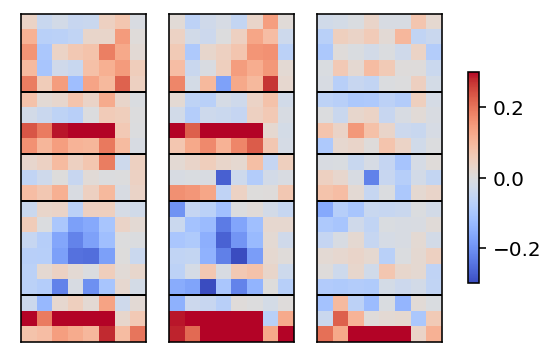

In [14]:
vmin=-0.3
vmax=0.3

# PLOT
fig,ax=plt.subplots(1,3,figsize=(4,15))

# Ctrl
cax = ax[0].imshow(diff_ctrl_feat[good_types,:],cmap='coolwarm',vmax=vmax,vmin=vmin)
#ax[0].set_ylabel('RGC group',fontsize=8);
#ax[0].set_xlabel('Feature',fontsize=8);
ax[0].tick_params(axis='both', which='major', labelsize=8)
#ax[0].set_title('Ctrl',fontsize=8);
ax[0].set_xticks([])
ax[0].set_yticks([])

### NO
cax = ax[1].imshow(diff_no_feat[good_types,:],cmap='coolwarm',vmax=vmax,vmin=vmin)
#ax[1].set_xlabel('RGC group',fontsize=8);
#ax[1].set_ylabel('Features',fontsize=8);
ax[1].tick_params(axis='both', which='major', labelsize=8)
#ax[1].set_title('NO',fontsize=8);
ax[1].set_xticks([])
ax[1].set_yticks([])

### diff of diff Ctrl/NO
cax = ax[2].imshow(diff_feat[good_types,:],cmap='coolwarm',vmax=vmax,vmin=vmin)
#ax[2].set_xlabel('RGC group',fontsize=8);
#ax[1].set_ylabel('Features',fontsize=8);
ax[2].tick_params(axis='both', which='major', labelsize=8)
#ax[2].set_title('Diff',fontsize=8);
ax[2].set_xticks([])
ax[2].set_yticks([])

for i in range(3):
    ax[i].axhline(4.5,ls='-',lw=1,color='k')
    ax[i].axhline(8.5,ls='-',lw=1,color='k')
    ax[i].axhline(11.5,ls='-',lw=1,color='k')
    ax[i].axhline(17.5,ls='-',lw=1,color='k')
fig.tight_layout()

cbar = plt.colorbar(cax,ax=ax,shrink=0.1)
#cbar.set_label('Fraction', rotation=270,fontsize=8)
cbar.ax.get_yaxis().labelpad = 8

# Compare with Ctrl dataset

In [15]:
rgc_types = np.where(dict_c1['cell_type']<33)[0]

In [16]:
# get mean responses from Ctrl dataset and its label
mean_chirp_c1 = np.zeros((32,249))
mean_chirp_c2 = np.zeros((32,249))
mean_bar_c1 = np.zeros((32,32))
mean_bar_c2 = np.zeros((32,32))

std_chirp_c1 = np.zeros((32,249))
std_chirp_c2 = np.zeros((32,249))
std_bar_c1 = np.zeros((32,32))
std_bar_c2 = np.zeros((32,32))

for i,j in enumerate(np.unique(dict_c1['cell_type'][rgc_types])):   
    idx = np.where(dict_c1['cell_type']==j)[0]
    mean_chirp_c1[i,:] = np.mean(dict_c1['chirp'][idx,:],axis=0)
    mean_chirp_c2[i,:] = np.mean(dict_c2['chirp'][idx,:],axis=0)
    mean_bar_c1[i,:] = np.mean(dict_c1['bar'][idx,:],axis=0)
    mean_bar_c2[i,:] = np.mean(dict_c2['bar'][idx,:],axis=0)    
    
    std_chirp_c1[i,:] = np.std(dict_c1['chirp'][idx,:],axis=0)
    std_chirp_c2[i,:] = np.std(dict_c2['chirp'][idx,:],axis=0)
    std_bar_c1[i,:] = np.std(dict_c1['bar'][idx,:],axis=0)
    std_bar_c2[i,:] = np.std(dict_c2['bar'][idx,:],axis=0)    

In [17]:
# get mean responses from Ctrl dataset and its label
mean_chirp_c = np.zeros((32,249))
mean_chirp_d = np.zeros((32,249))
mean_bar_c = np.zeros((32,32))
mean_bar_d = np.zeros((32,32))

std_chirp_c = np.zeros((32,249))
std_chirp_d = np.zeros((32,249))
std_bar_c = np.zeros((32,32))
std_bar_d = np.zeros((32,32))

for i,j in enumerate(np.unique(dict_c_no['cell_type'][rgc_types_no])):   
    idx = np.where(dict_c_no['cell_type']==j)[0]
    mean_chirp_c[i,:] = np.mean(dict_c_no['chirp'][idx,:],axis=0)
    mean_chirp_d[i,:] = np.mean(dict_d_no['chirp'][idx,:],axis=0)
    mean_bar_c[i,:] = np.mean(dict_c_no['bar'][idx,:],axis=0)
    mean_bar_d[i,:] = np.mean(dict_d_no['bar'][idx,:],axis=0)    
    
    std_chirp_c[i,:] = np.std(dict_c_no['chirp'][idx,:],axis=0)
    std_chirp_d[i,:] = np.std(dict_d_no['chirp'][idx,:],axis=0)
    std_bar_c[i,:] = np.std(dict_c_no['bar'][idx,:],axis=0)
    std_bar_d[i,:] = np.std(dict_d_no['bar'][idx,:],axis=0)    

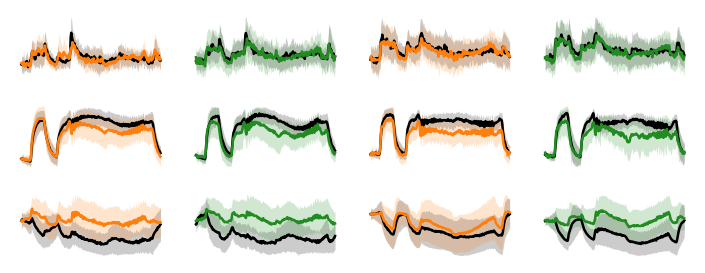

In [18]:
lw=1.25

color_ctrl = 'tab:orange'
color_no = 'forestgreen'

fig = plt.figure(figsize=(5,2))
ax = fig.subplot_mosaic(
    """
    JJDDAABB
    LLFFCCEE
    NNHHGGII
    """)
### Non-responding/Stable

i=1-1
ax['D'].plot(mean_chirp_c[i,:],color='black',lw=lw)
ax['D'].fill_between(np.arange(0,249,1),mean_chirp_c[i,:]+std_chirp_c[i,:],mean_chirp_c[i,:]-std_chirp_c[i,:],alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
ax['D'].axis('off')
#Ctrl 2: Chirp
ax['D'].plot(mean_chirp_d[i,:],color=color_no,lw=lw)
ax['D'].fill_between(np.arange(0,249,1),mean_chirp_d[i,:]+std_chirp_d[i,:],mean_chirp_d[i,:]-std_chirp_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['D'].axis('off')

# Ctrl
ax['J'].plot(mean_chirp_c1[i,:],color='black',lw=lw)
ax['J'].fill_between(np.arange(0,249,1),mean_chirp_c1[i,:]+std_chirp_c1[i,:],mean_chirp_c1[i,:]-std_chirp_c1[i,:],alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
ax['J'].axis('off')
#Ctrl 2: Chirp
ax['J'].plot(mean_chirp_c2[i,:],color=color_ctrl,lw=lw)
ax['J'].fill_between(np.arange(0,249,1),mean_chirp_c2[i,:]+std_chirp_c2[i,:],mean_chirp_c2[i,:]-std_chirp_c2[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['J'].axis('off')


i=12-1
ax['B'].plot(mean_chirp_c[i,:],color='black',lw=lw)
ax['B'].fill_between(np.arange(0,249,1),mean_chirp_c[i,:]+std_chirp_c[i,:],mean_chirp_c[i,:]-std_chirp_c[i,:],alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
ax['B'].axis('off')
#Ctrl 2: Chirp
ax['B'].plot(mean_chirp_d[i,:],color=color_no,lw=lw)
ax['B'].fill_between(np.arange(0,249,1),mean_chirp_d[i,:]+std_chirp_d[i,:],mean_chirp_d[i,:]-std_chirp_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['B'].axis('off')

# Ctrl
ax['A'].plot(mean_chirp_c1[i,:],color='black',lw=lw)
ax['A'].fill_between(np.arange(0,249,1),mean_chirp_c1[i,:]+std_chirp_c1[i,:],mean_chirp_c1[i,:]-std_chirp_c1[i,:],alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
ax['A'].axis('off')
#Ctrl 2: Chirp
ax['A'].plot(mean_chirp_c2[i,:],color=color_ctrl,lw=lw)
ax['A'].fill_between(np.arange(0,249,1),mean_chirp_c2[i,:]+std_chirp_c2[i,:],mean_chirp_c2[i,:]-std_chirp_c2[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['A'].axis('off')



#################################

### Time-affected

i=22-1
ax['F'].plot(mean_chirp_c[i,:],color='black',lw=lw)
ax['F'].fill_between(np.arange(0,249,1),mean_chirp_c[i,:]+std_chirp_c[i,:],mean_chirp_c[i,:]-std_chirp_c[i,:],alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
ax['F'].axis('off')
#Ctr 2: Chirp
ax['F'].plot(mean_chirp_d[i,:],color=color_no,lw=lw)
ax['F'].fill_between(np.arange(0,249,1),mean_chirp_d[i,:]+std_chirp_d[i,:],mean_chirp_d[i,:]-std_chirp_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['F'].axis('off')

# Ctrl
ax['L'].plot(mean_chirp_c1[i,:],color='black',lw=lw)
ax['L'].fill_between(np.arange(0,249,1),mean_chirp_c1[i,:]+std_chirp_c1[i,:],mean_chirp_c1[i,:]-std_chirp_c1[i,:],alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
ax['L'].axis('off')
#Ctrl 2: Chirp
ax['L'].plot(mean_chirp_c2[i,:],color=color_ctrl,lw=lw)
ax['L'].fill_between(np.arange(0,249,1),mean_chirp_c2[i,:]+std_chirp_c2[i,:],mean_chirp_c2[i,:]-std_chirp_c2[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['L'].axis('off')

i=24-1
ax['E'].plot(mean_chirp_c[i,:],color='black',lw=lw)
ax['E'].fill_between(np.arange(0,249,1),mean_chirp_c[i,:]+std_chirp_c[i,:],mean_chirp_c[i,:]-std_chirp_c[i,:],alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
ax['E'].axis('off')
#Ctr 2: Chirp
ax['E'].plot(mean_chirp_d[i,:],color=color_no,lw=lw)
ax['E'].fill_between(np.arange(0,249,1),mean_chirp_d[i,:]+std_chirp_d[i,:],mean_chirp_d[i,:]-std_chirp_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['E'].axis('off')

# Ctrl
ax['C'].plot(mean_chirp_c1[i,:],color='black',lw=lw)
ax['C'].fill_between(np.arange(0,249,1),mean_chirp_c1[i,:]+std_chirp_c1[i,:],mean_chirp_c1[i,:]-std_chirp_c1[i,:],alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
ax['C'].axis('off')
#Ctrl 2: Chirp
ax['C'].plot(mean_chirp_c2[i,:],color=color_ctrl,lw=lw)
ax['C'].fill_between(np.arange(0,249,1),mean_chirp_c2[i,:]+std_chirp_c2[i,:],mean_chirp_c2[i,:]-std_chirp_c2[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['C'].axis('off')


#################################

i=31-1
ax['H'].plot(mean_chirp_c[i,:],color='black',lw=lw)
ax['H'].fill_between(np.arange(0,249,1),mean_chirp_c[i,:]+std_chirp_c[i,:],mean_chirp_c[i,:]-std_chirp_c[i,:],alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
ax['H'].axis('off')
#Ctr 2: Chirp
ax['H'].plot(mean_chirp_d[i,:],color=color_no,lw=lw)
ax['H'].fill_between(np.arange(0,249,1),mean_chirp_d[i,:]+std_chirp_d[i,:],mean_chirp_d[i,:]-std_chirp_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['H'].axis('off')

# Ctrl
ax['N'].plot(mean_chirp_c1[i,:],color='black',lw=lw)
ax['N'].fill_between(np.arange(0,249,1),mean_chirp_c1[i,:]+std_chirp_c1[i,:],mean_chirp_c1[i,:]-std_chirp_c1[i,:],alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
ax['N'].axis('off')
#Ctrl 2: Chirp
ax['N'].plot(mean_chirp_c2[i,:],color=color_ctrl,lw=lw)
ax['N'].fill_between(np.arange(0,249,1),mean_chirp_c2[i,:]+std_chirp_c2[i,:],mean_chirp_c2[i,:]-std_chirp_c2[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['N'].axis('off')


i = 32-1
ax['I'].plot(mean_chirp_c[i,:],color='black',lw=lw)
ax['I'].fill_between(np.arange(0,249,1),mean_chirp_c[i,:]+std_chirp_c[i,:],mean_chirp_c[i,:]-std_chirp_c[i,:],alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
ax['I'].axis('off')
#Ctr 2: Chirp
ax['I'].plot(mean_chirp_d[i,:],color=color_no,lw=lw)
ax['I'].fill_between(np.arange(0,249,1),mean_chirp_d[i,:]+std_chirp_d[i,:],mean_chirp_d[i,:]-std_chirp_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['I'].axis('off')

# Ctrl
ax['G'].plot(mean_chirp_c1[i,:],color='black',lw=lw)
ax['G'].fill_between(np.arange(0,249,1),mean_chirp_c1[i,:]+std_chirp_c1[i,:],mean_chirp_c1[i,:]-std_chirp_c1[i,:],alpha=0.2,color='black',edgecolor="b", linewidth=0.0)
ax['G'].axis('off')
#Ctrl 2: Chirp
ax['G'].plot(mean_chirp_c2[i,:],color=color_ctrl,lw=lw)
ax['G'].fill_between(np.arange(0,249,1),mean_chirp_c2[i,:]+std_chirp_c2[i,:],mean_chirp_c2[i,:]-std_chirp_c2[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['G'].axis('off')


fig.tight_layout()

# --------------------------------------------------------------------------------------------------------------------

# Statistical analysis between Ctrl and NO dataset differences per feature using two-sided t-test

In [19]:
cell_types = good_types+1
ctrl_condition_str = ['ctrl']*len(cell_types)
no_condition_str = ['NO']*len(cell_types)
both_condition_str = np.concatenate((ctrl_condition_str,no_condition_str))

# combine datasets
ctrl_data = np.hstack((diff_ctrl_feat[good_types,:],cell_types[:,None]))
no_data = np.hstack((diff_no_feat[good_types,:],cell_types[:,None]))
data_both = np.vstack((ctrl_data,no_data))

In [20]:
df_feature = pd.DataFrame(data_both, columns=['feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','cell_type'])
df_feature['condition'] = both_condition_str

In [21]:
rgc_types_ctrl = np.where(dict_c1['cell_type']<33)[0]
rgc_types_no = np.where(dict_c_no['cell_type']<33)[0]

In [22]:
# control dataset
ctrl_c1 = np.hstack((dict_c1['chirp'][rgc_types_ctrl],dict_c1['bar'][rgc_types_ctrl]))
ctrl_c2 = np.hstack((dict_c2['chirp'][rgc_types_ctrl],dict_c2['bar'][rgc_types_ctrl]))

# NO dataset
ctrl_c = np.hstack((dict_c_no['chirp'][rgc_types_no],dict_c_no['bar'][rgc_types_no]))
ctrl_d = np.hstack((dict_d_no['chirp'][rgc_types_no],dict_d_no['bar'][rgc_types_no]))

In [23]:
# compute difference
diff_ctrl_dataset = ctrl_c2-ctrl_c1
diff_no_dataset = ctrl_d-ctrl_c

In [24]:
p_values_t_test = np.zeros((good_types.shape[0],8))

for i,j in enumerate(good_types):    
    diff_ctrl_mat = diff_ctrl_dataset[np.where(dict_c1['cell_type'][rgc_types_ctrl]==j+1)[0]]
    diff_feat_ctrl = np.zeros((diff_ctrl_mat.shape[0],8))
    
    for k in range(diff_ctrl_mat.shape[0]):
        diff_feat_ctrl[k,0] = (np.mean(diff_ctrl_mat[k,on_feat_idx[0]:on_feat_idx[1]]))
        diff_feat_ctrl[k,1] = (np.mean(diff_ctrl_mat[k,off_feat_idx[0]:off_feat_idx[1]]))
        diff_feat_ctrl[k,2] = (np.mean(diff_ctrl_mat[k,low_freq_feat_idx[0]:low_freq_feat_idx[1]]))
        diff_feat_ctrl[k,3] = (np.mean(diff_ctrl_mat[k,high_freq_feat_idx[0]:high_freq_feat_idx[1]]))
        diff_feat_ctrl[k,4] = (np.mean(diff_ctrl_mat[k,low_cont_feat_idx[0]:low_cont_feat_idx[1]]))
        diff_feat_ctrl[k,5] = (np.mean(diff_ctrl_mat[k,high_cont_feat_idx[0]:high_cont_feat_idx[1]]))    
        diff_feat_ctrl[k,6] = (np.mean(diff_ctrl_mat[k,249+mb_on_feat_idx[0]:249+mb_on_feat_idx[1]]))
        diff_feat_ctrl[k,7] = (np.mean(diff_ctrl_mat[k,249+mb_off_feat_idx[0]:249+mb_off_feat_idx[1]])) 
    
    diff_no_mat = diff_no_dataset[np.where(dict_c_no['cell_type'][rgc_types_no]==j+1)[0]]
    diff_feat_no = np.zeros((diff_no_mat.shape[0],8))
    
    for k in range(diff_no_mat.shape[0]):
        diff_feat_no[k,0] = (np.mean(diff_no_mat[k,on_feat_idx[0]:on_feat_idx[1]]))
        diff_feat_no[k,1] = (np.mean(diff_no_mat[k,off_feat_idx[0]:off_feat_idx[1]]))
        diff_feat_no[k,2] = (np.mean(diff_no_mat[k,low_freq_feat_idx[0]:low_freq_feat_idx[1]]))
        diff_feat_no[k,3] = (np.mean(diff_no_mat[k,high_freq_feat_idx[0]:high_freq_feat_idx[1]]))
        diff_feat_no[k,4] = (np.mean(diff_no_mat[k,low_cont_feat_idx[0]:low_cont_feat_idx[1]]))
        diff_feat_no[k,5] = (np.mean(diff_no_mat[k,high_cont_feat_idx[0]:high_cont_feat_idx[1]]))    
        diff_feat_no[k,6] = (np.mean(diff_no_mat[k,249+mb_on_feat_idx[0]:249+mb_on_feat_idx[1]]))
        diff_feat_no[k,7] = (np.mean(diff_no_mat[k,249+mb_off_feat_idx[0]:249+mb_off_feat_idx[1]])) 

    for x in range(8):        
        _, p_values_t_test[i,x] = stats.ttest_ind(diff_feat_ctrl[:,x], diff_feat_no[:,x])

In [25]:
alpha = 0.05  # Original significance level
num_comparisons = 8*21  # Number of independent comparisons (groups being tested)

# Bonferroni correction: Adjust the significance level
alpha_bonferroni = alpha / num_comparisons
print(alpha_bonferroni)

0.00029761904761904765


In [26]:
sig_features_ttest = np.zeros((good_types.shape[0],8))
for i in range(len(good_types)):
    for j in range(8):
        if p_values_t_test[i,j] < alpha_bonferroni:
            sig_features_ttest[i,j] = 1
        else:
            sig_features_ttest[i,j] = 0

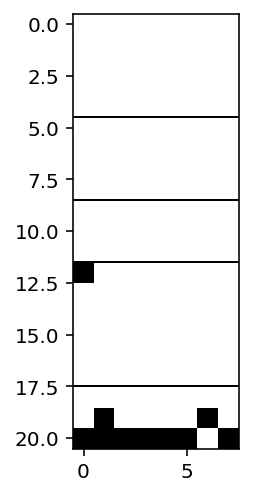

In [27]:
plt.imshow(sig_features_ttest,cmap='binary')
plt.axhline(4.5,ls='-',lw=1,color='k')
plt.axhline(8.5,ls='-',lw=1,color='k')
plt.axhline(11.5,ls='-',lw=1,color='k')
plt.axhline(17.5,ls='-',lw=1,color='k')